<a href="https://colab.research.google.com/github/sanju492/first_project/blob/main/Explotory_data_analysis_visualisation_SANJU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Setup & Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Sample - Superstore.xls')
print(df.head())
print(df.info())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0     42420.0   South  FUR-BO-10

###Univariate Analysis

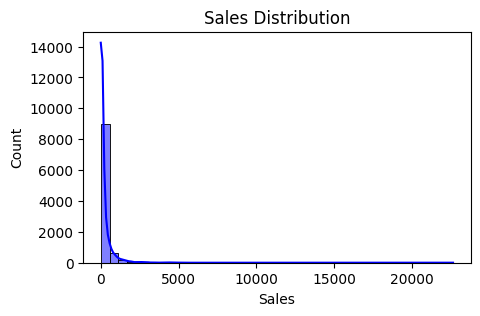

In [ ]:
# 1. Histogram - Sales
plt.figure(figsize =(5,3))
sns.histplot(df['Sales'],color = 'blue',kde = True,bins = 40)

plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()


*  Sales distribution is right-skewed → most sales are low,
few very high.

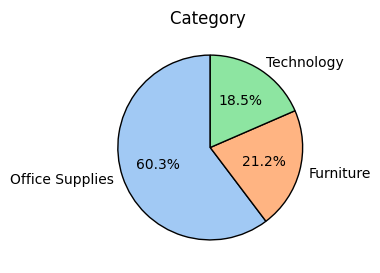

In [ ]:
## 2. Pie Chart - Category
plt.figure(figsize = (5,3))

plt.pie(df['Category'].value_counts(),
        labels=df['Category'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        wedgeprops={"edgecolor":"black","linewidth":1})

plt.title("Category ")
plt.show()

*  Office Supplies dominate in count, followed by Furniture and Technology.

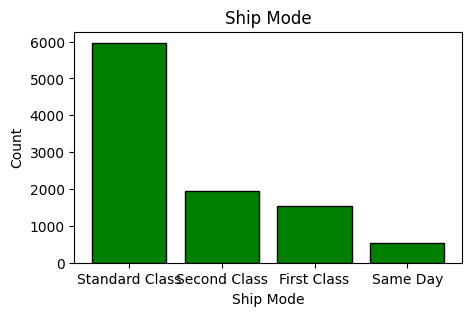

In [ ]:
# Bar Chart - Ship Mode
plt.figure(figsize = (5,3))

ship_mode_counts = df['Ship Mode'].value_counts()
plt.bar(ship_mode_counts.index, ship_mode_counts.values, color = 'green',edgecolor = 'black')

plt.title('Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

*   List item Standard Class is the most used shipping mode.

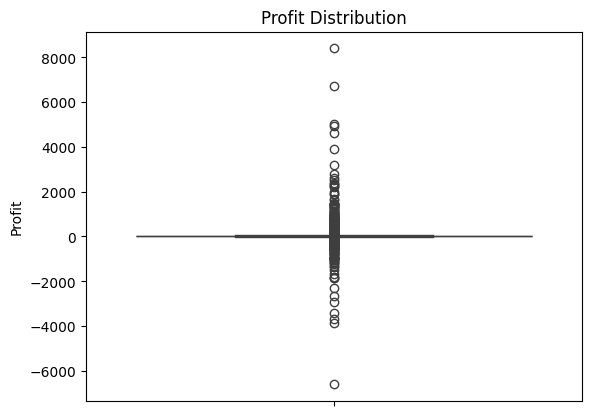

In [ ]:
## Boxplot - Profit
sns.boxplot(df['Profit'])
plt.title('Profit Distribution')
plt.show()











*   Profit distribution shows many outliers → indicating some loss-making orders.














###Bivariate Analysis

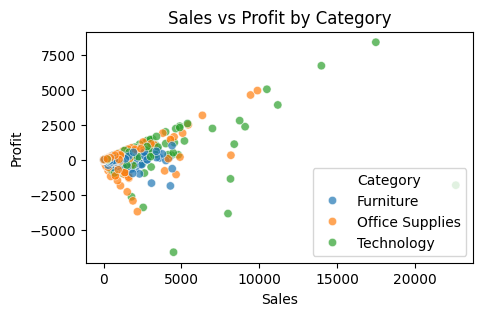

In [ ]:
# Scatterplot - Sales vs Profit

plt.figure(figsize = (5,3))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df, alpha=0.7)
plt.title("Sales vs Profit by Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()








*   Sales vs Profit: Some high-sales orders result in losses (esp. in Technology )





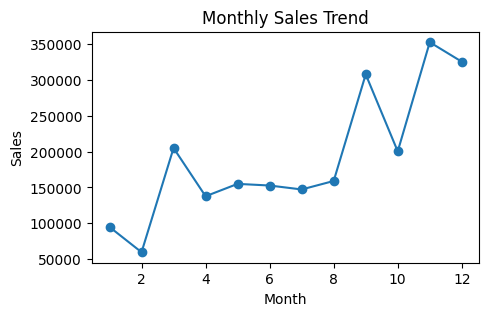

In [ ]:
## Line Chart - Monthly Sales Trend
plt.figure(figsize = (5,3))

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.plot(monthly_sales.index, monthly_sales.values, marker='o')

plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.show()




*   Sales fluctuate but generally increase year-end



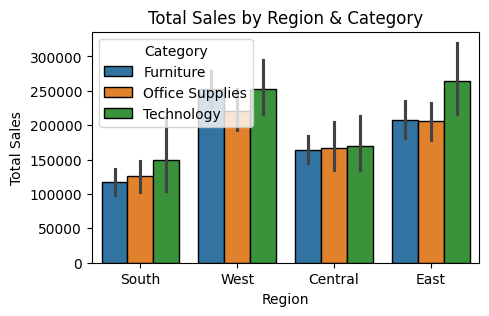

In [ ]:
# Bar Plot - Region vs Sales

plt.figure(figsize = (5,3))
sns.barplot(x="Region", y="Sales", hue="Category", data=df, estimator=sum, edgecolor='black')
plt.title("Total Sales by Region & Category")
plt.ylabel("Total Sales")
plt.show()





*   West & East lead in sales, South lags.


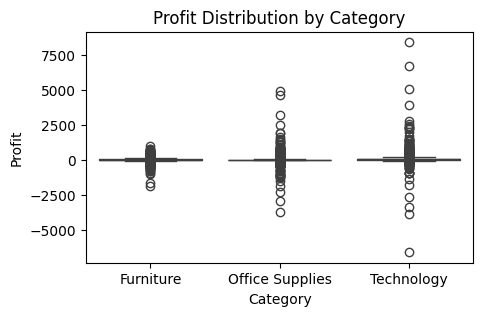

In [ ]:
# Boxplot - Category vs Profit
plt.figure(figsize = (5,3))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title("Profit Distribution by Category")
plt.show()



*   Furniture often has low or negative profit margins.



###Multivariate Analysis

<Figure size 500x300 with 0 Axes>

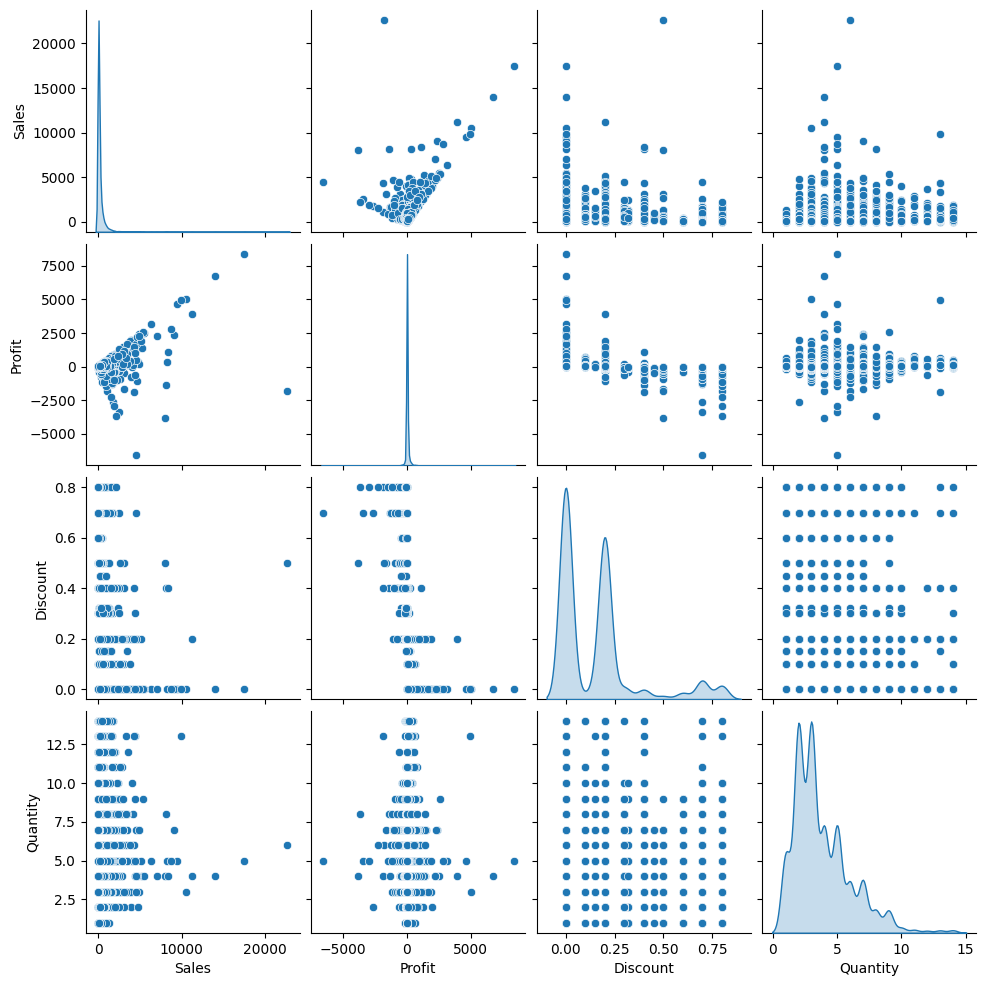

In [ ]:
# Pairplot
plt.figure(figsize = (5,3))
sns.pairplot(df[['Sales','Profit','Discount','Quantity']], diag_kind='kde')
plt.show()

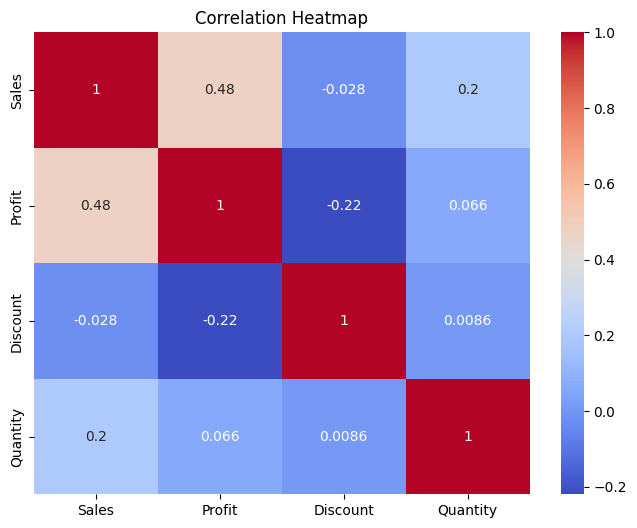

In [ ]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales','Profit','Discount','Quantity']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



*   Profit is negatively correlated with discount (-0.22).



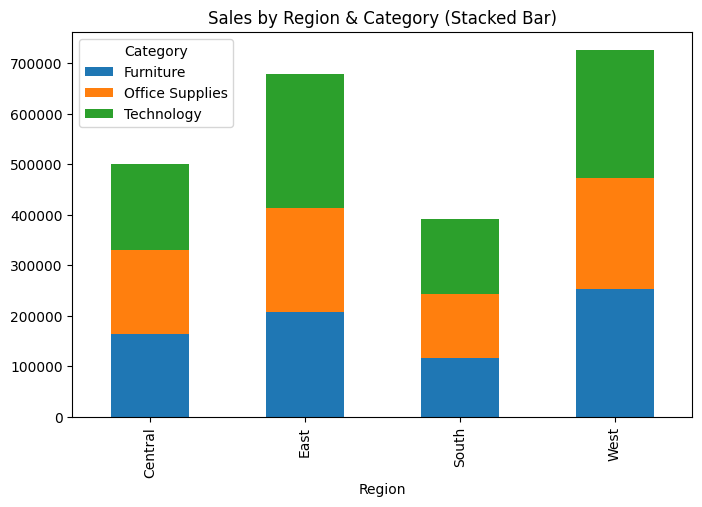

In [ ]:
# Stacked Bar - Region & Category
pivot = df.pivot_table(index='Region', columns='Category', values='Sales', aggfunc='sum')
pivot.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Sales by Region & Category (Stacked Bar)")
plt.show()



*    Furniture struggles across regions.

